# The Hamiltonian Nullspace Shuttle

This notebook implements the Hamiltonian Nullspace Shuttle in its pure form for an analytically defined, one-dimensional misfit function.

## 1. Import Python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## 2. Set basic input parameters

In [3]:
# Coordinate lines in model and momentum space.
delta=0.1
m_line=np.arange(-15.0,15.0,delta)
p_line=np.arange(-3.3,3.3,delta)

# Leapfrog parameters (number of steps and step length).
nt=230
dt=0.1

# Initial model and momentum.
m=np.zeros(nt)
p=np.zeros(nt)
m[0]=0.1
p[0]=0.5

# Misfit function.
function='cycleskip'

## 3. Define analytic kinetic energy and its derivative.

In [35]:
def U(m,function='cycleskip'):
    
    if function=='cycleskip':
        return 1.0-np.cos(m)+0.025*m**2
        

def dU(m,function='cycleskip'):
    
    if function=='cycleskip':
        return np.sin(m)+0.05*m


In [39]:
np.remainder(10.0,2.0)

0.0

## 4. Leapfrog time stepping.

In [7]:
# Time stepping.
for n in range(nt-1):
    p_half=p[n]-0.5*dt*dU(m[n],function)
    m[n+1]=m[n]+dt*p_half
    p[n+1]=p_half-0.5*dt*dU(m[n+1],function)

## 5. Plotting.

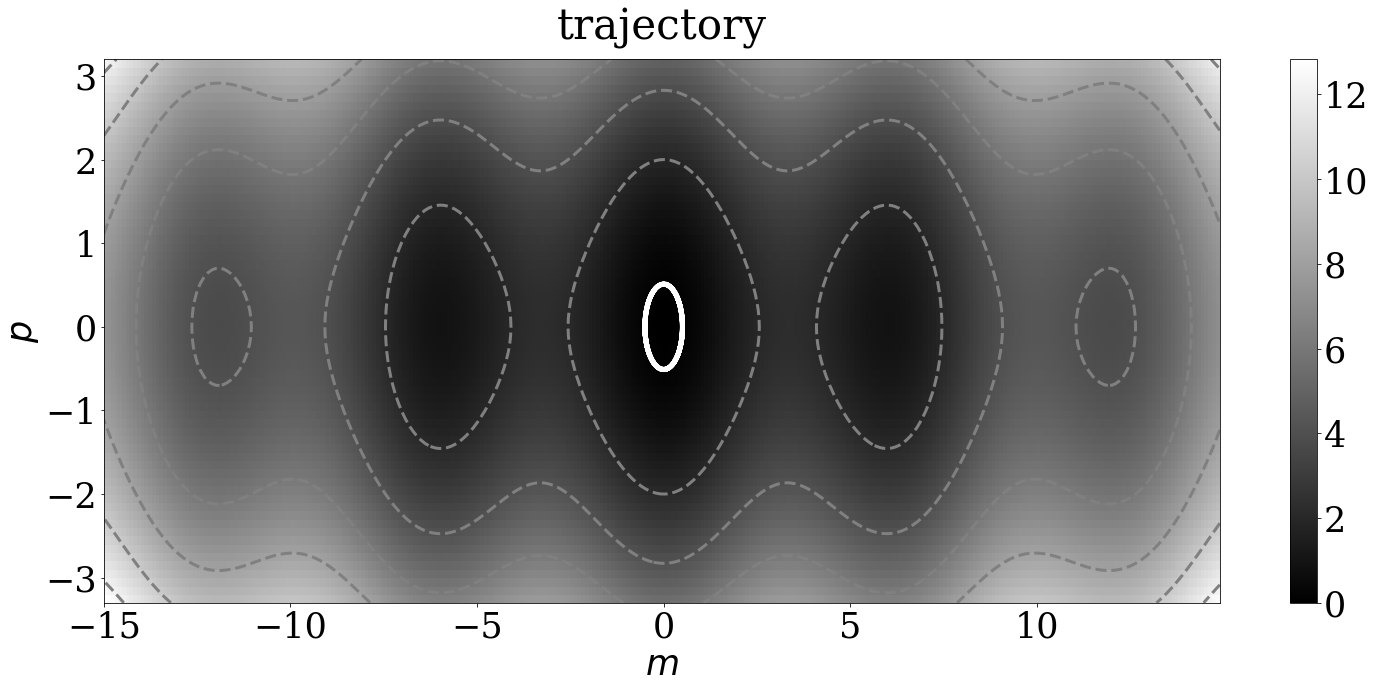

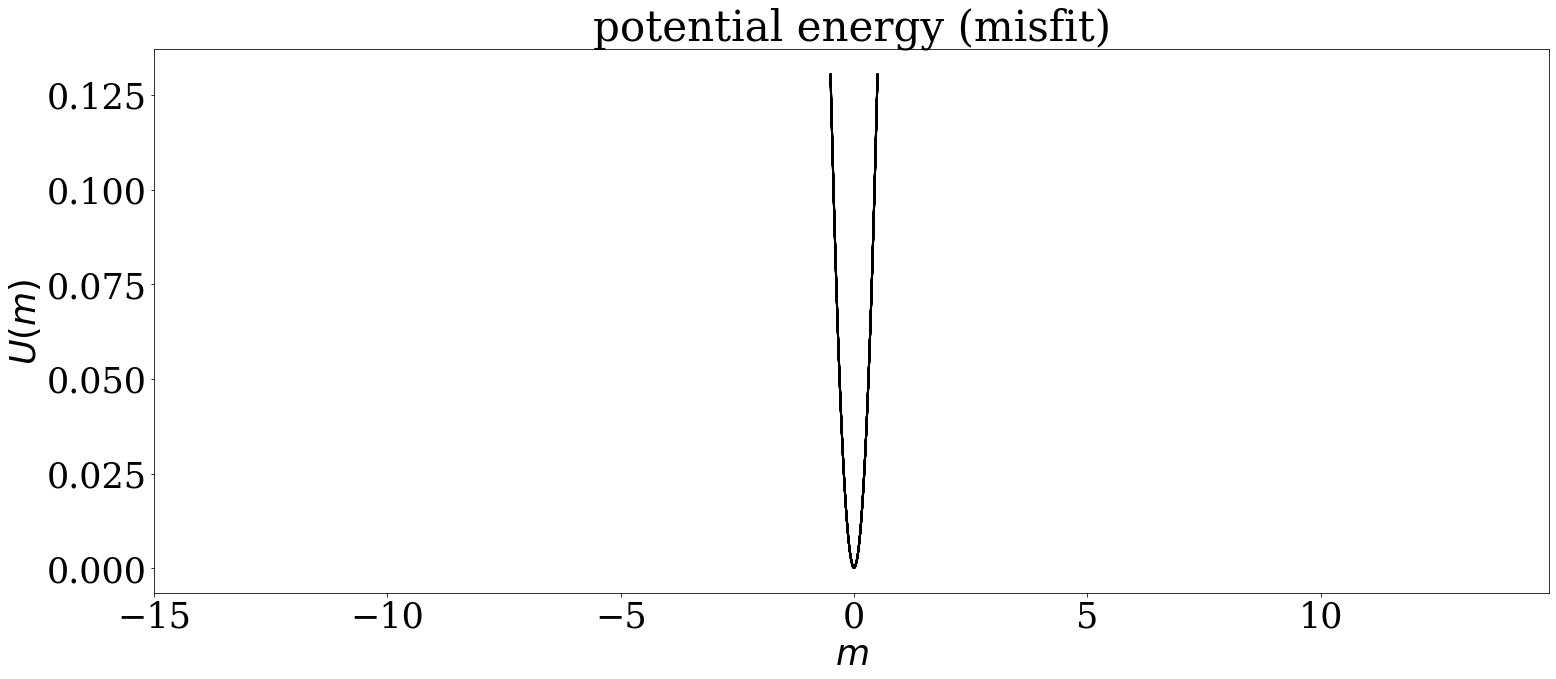

In [34]:
# Set some plotting options.
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 35})

# Plot Hamiltonian surface with superimposed trajectory.
M,P=np.meshgrid(m_line,p_line)
H=0.5*P*P+U(M)

plt.subplots(1, figsize=(25,10))
plt.pcolor(M,P,H,cmap=cm.gray)
plt.colorbar()
plt.contour(M,P,H,colors='grey',linewidths=3,linestyles='dashed')
plt.plot(m,p,'w',linewidth=5)
plt.xlabel(r'$m$')
plt.ylabel(r'$p$')
plt.title('trajectory',pad=20)
plt.show()

# Plot potential energy sampled by the shuttle.

plt.subplots(1, figsize=(25,10))
plt.plot(m,U(m),'k',linewidth=2)
plt.xlim([m_line[0],m_line[-1]])
plt.xlabel(r'$m$')
plt.ylabel(r'$U(m)$')
plt.title('potential energy (misfit)')
plt.show()
